In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from soccer import soccer_game
from qlearner import QLearner
from friendq import FriendQ
from foeq import FoeQ
from ceq import ceQ
from training import *

In [2]:
def learning_2005(learner, env, 
             epsilon=1, 
             gamma = 0.9,
             max_iteration=200000):
# following Greenwald 2005 paper LR decaying schedule: 
# decay by 1/n(s,a) n(s,a) is # of visit to state-action pair

    np.random.seed(10)
    
    a = np.ones([env.nS]+list(env.nA))
    c = np.zeros([env.nS]+list(env.nA))
    
    hist = []
    s = env.reset()
    done = False
    for i in tqdm(range(max_iteration)):
        if done:
            s = env.reset()

        action = epsilon_greedy(learner, env, s, epsilon)
        next_s, r, done, info = env.step(action)
        learner.update(s, next_s, action, r, done, a[s][action], gamma)
            
        c[s][action] += 1
        a[s][action] = 1/c[s][action]
         
        s = next_s
        
        hist.append(learner.log_value())
        
    return hist, a, c

### Q-Learning

In [2]:
env = soccer_game()
learner_q = QLearner(env.nS, env.nA)

hist_q = learning_2005(learner_q, env, epsilon=0.01)

100%|██████████| 200000/200000 [00:09<00:00, 21174.06it/s]


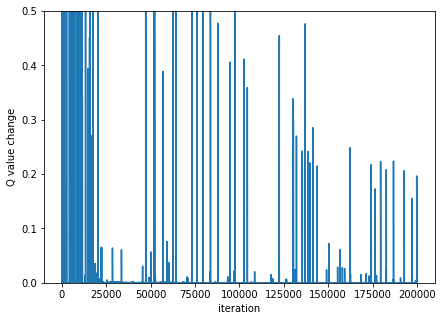

In [3]:
plot_error(hist_q, "figures/Q.png")

### Friend-Q

In [8]:
env = soccer_game()
learner_friendQ = FriendQ(env.nS, env.nA)

hist_friendQ = learning_2005(learner_friendQ, env, epsilon=0.8)

100%|██████████| 200000/200000 [00:11<00:00, 17761.93it/s]


In [7]:
for i in range(8):
    for j in range(8):
        if i==j:
            continue
        for k in [True, False]:
            idx = env.state_idx[(i,j,k)]
            print(c[idx].sum())
c.shape

0.0
517.0
0.0
490.0
0.0
0.0
0.0
0.0
0.0
772.0
0.0
772.0
0.0
0.0
1322.0
0.0
585.0
748.0
308.0
0.0
956.0
0.0
1829.0
3836.0
717.0
1747.0
343.0
0.0
2062.0
0.0
10445.0
63058.0
294.0
0.0
1160.0
0.0
2313.0
11290.0
1180.0
3291.0
340.0
0.0
0.0
0.0
0.0
10493.0
0.0
6056.0
0.0
0.0
0.0
7976.0
0.0
4064.0
0.0
0.0
0.0
0.0
0.0
587.0
0.0
617.0
0.0
0.0
0.0
451.0
0.0
465.0
0.0
0.0
1098.0
0.0
1624.0
2053.0
840.0
1367.0
427.0
0.0
968.0
0.0
554.0
811.0
258.0
0.0
1826.0
0.0
3855.0
8973.0
1725.0
4153.0
410.0
0.0
1172.0
0.0
3039.0
7443.0
274.0
0.0
0.0
0.0
0.0
4679.0
0.0
3704.0
0.0
0.0
0.0
0.0
0.0
4187.0
0.0
3476.0


(112, 5, 5)

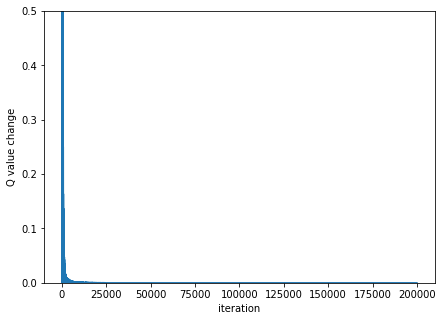

In [5]:
plot_error(hist_friendQ, "figures/friendQ.png")

In [9]:
# Q table for state 71
show_table(learner_friendQ.agents[0].Q[71])
show_table(learner_friendQ.agents[1].Q[71])

player B,stick,W,E,N,S
player A,,,,,
stick,9.000,10.0,8.548,9.000,8.992
W,8.996,10.0,8.778,9.000,8.987
E,9.000,10.0,-0.831,9.000,8.992
N,9.000,10.0,8.549,9.000,8.992
S,9.000,10.0,8.094,8.987,9.000


player B,stick,W,E,N,S
player A,,,,,
stick,8.520,-10.0,8.999,8.518,8.094
W,8.511,-10.0,8.760,8.522,8.092
E,8.092,-10.0,9.493,8.100,8.085
N,8.523,-10.0,9.000,8.521,8.091
S,8.100,-10.0,9.000,8.096,8.488


In [7]:
# Player 2's action
learner_friendQ.agents[1].select_action(71)

2

### Foe-Q

In [13]:
env = soccer_game()
learner_foeQ = FoeQ(env.nS, env.nA)
#learner_foeQ.agent1.Q = np.random.rand(112,5,5)
#learner_foeQ.agent2.Q = np.random.rand(112,5,5)

hist_foeQ = learning_2005(learner_foeQ, env, epsilon=1, max_iteration=1000000)

100%|██████████| 1000000/1000000 [09:26<00:00, 1764.21it/s]


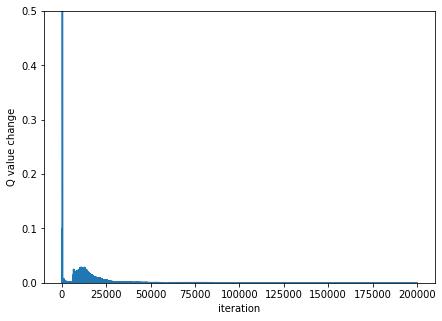

In [9]:
#plot_error(hist_foeQ, "figures/foeQ.png")

In [14]:
# Q value for state(71)
show_table(learner_foeQ.agent1.Q[71])
show_table(learner_foeQ.agent2.Q[71])

player B,stick,W,E,N,S
player A,,,,,
stick,-2.290,-2.279,-3.067,-2.283,-2.860
W,10.000,10.000,10.000,10.000,10.000
E,2.231,-0.023,-9.062,2.227,-3.026
N,-2.279,-2.279,-3.067,-2.284,-2.854
S,-3.188,-5.421,-7.114,-3.183,-2.260


player B,stick,W,E,N,S
player A,,,,,
stick,2.290,-10.0,-2.231,2.279,3.188
W,2.279,-10.0,0.023,2.279,5.421
E,3.067,-10.0,9.062,3.067,7.114
N,2.283,-10.0,-2.227,2.284,3.183
S,2.860,-10.0,3.026,2.854,2.260


In [15]:
# Policy -- probablity distribution
# stick left right up down
learner_foeQ.agent1.p[71].round(3),  learner_foeQ.agent2.p[71].round(3)

(array([0. , 0. , 0. , 0.4, 0.6]), array([0.615, 0.   , 0.   , 0.   , 0.385]))

### Correlated Q

In [12]:
env = soccer_game()
learner_ceQ = ceQ(env.nS, env.nA)

hist_ceQ = learning_2005(learner_ceQ, env, epsilon=1)

100%|██████████| 200000/200000 [14:51<00:00, 224.45it/s]


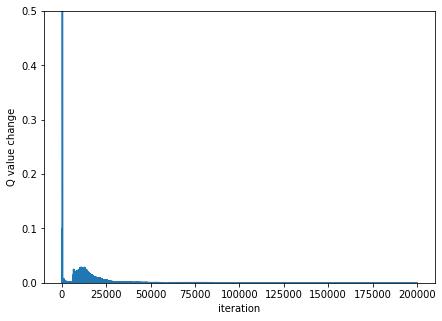

In [13]:
plot_error(hist_ceQ, "figures/ceQ.png")

In [14]:
# Q value for state(71)
show_table(learner_ceQ.agents[0].Q[71])
show_table(learner_ceQ.agents[1].Q[71])

player B,stick,W,E,N,S
player A,,,,,
stick,-1.985,10.0,1.884,-1.938,-3.639
W,-1.930,10.0,-0.038,-1.931,-5.097
E,-3.449,10.0,-9.060,-3.448,-6.582
N,-1.960,10.0,1.873,-1.962,-3.614
S,-3.089,10.0,-2.941,-3.060,-1.878


player B,stick,W,E,N,S
player A,,,,,
stick,1.985,-10.0,-1.884,1.938,3.639
W,1.930,-10.0,0.038,1.931,5.097
E,3.449,-10.0,9.060,3.448,6.582
N,1.960,-10.0,-1.873,1.962,3.614
S,3.089,-10.0,2.941,3.060,1.878


In [15]:
# Policy -- probablity distribution
# stick left right up down
p = learner_ceQ.p[71].reshape(5,5)
p.sum(axis=1).round(3), p.sum(axis=0).round(3) #for each agent i's marginal probabiliby, we should sum up all axis!=i

(array([0.   , 0.   , 0.   , 0.423, 0.577]),
 array([0.606, 0.   , 0.   , 0.   , 0.394]))

### Compare Foe-Q and Correlated-Q Q values

* difference between Q values

In [16]:
np.round(learner_ceQ.agents[0].Q[71]-learner_foeQ.agent1.Q[71].T, 10)

array([[ 2.00e-08,  0.00e+00, -2.60e-08,  1.98e-08,  3.00e-10],
       [ 1.94e-08,  0.00e+00, -3.50e-09,  1.94e-08,  6.50e-09],
       [ 1.41e-08,  0.00e+00,  4.90e-09,  1.41e-08,  1.61e-08],
       [ 1.94e-08,  0.00e+00, -2.61e-08,  1.97e-08,  3.00e-10],
       [ 1.55e-08,  0.00e+00,  2.10e-09,  1.60e-08,  1.88e-08]])

* Given a same Q table, foe-Q and ce-Q should give the same solution

In [17]:
Q = np.array([[-25., -26., -29., -26., -36.],
              [100., 100., 100., 100., 100.],
              [ 10.,  -7., -91.,  10., -33.],
              [-28., -28., -28., -27., -37.],
              [-39., -38., -65., -39., -24.]])
learner_foeQ.agent1.Q[71] = Q
learner_foeQ.agent2.Q[71] = -Q.T

In [18]:
learner_foeQ.agent1.minmax(71)
print("p1", learner_foeQ.agent1.p[71].round(3), "V1", learner_foeQ.agent1.V[71])
learner_foeQ.agent2.minmax(71)
print("p1", learner_foeQ.agent2.p[71].round(3), "V1", learner_foeQ.agent2.V[71])

p1 [0.   0.   0.   0.52 0.48] V1 -31.800000000000004
p1 [0.  0.  0.  0.6 0.4] V1 31.8


In [19]:
learner_ceQ.agents[0].Q[71] = Q.T
learner_ceQ.agents[1].Q[71] = -Q.T

learner_ceQ.solve(71)
p = learner_ceQ.p[71].reshape(5,5)
print("p1", p.sum(axis=1).round(3), "V1", learner_ceQ.agents[0].V[71])
print("p2", p.sum(axis=0).round(2), "V2", learner_ceQ.agents[1].V[71])

p1 [0.   0.   0.   0.52 0.48] V1 -31.799999894036688
p2 [0.  0.  0.  0.6 0.4] V2 31.799999894036688
